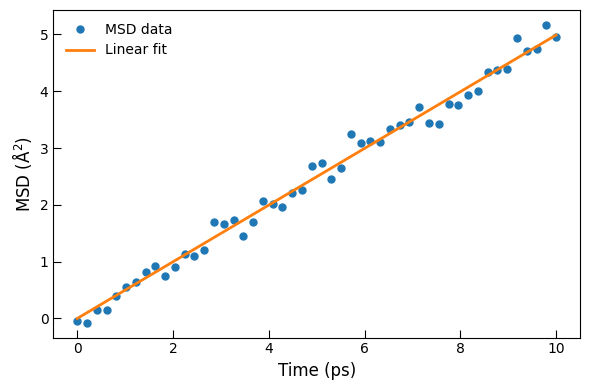

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# -------------------------
# Generate MSD data
# -------------------------
t = np.linspace(0, 10, 50)
D_true = 0.25
msd = 2 * D_true * t + np.random.normal(0, 0.2, size=len(t))

# -------------------------
# Fit model
# -------------------------
def msd_model(t, D):
    return 2 * D * t

params, cov = curve_fit(msd_model, t, msd)
D_fit = params[0]

# -------------------------
# Smooth fit curve
# -------------------------
t_fit = np.linspace(t.min(), t.max(), 200)
msd_fit = msd_model(t_fit, D_fit)

# -------------------------
# Journal-quality plot
# -------------------------
plt.figure(figsize=(6, 4))
plt.plot(t, msd, 'o', markersize=5, label="MSD data")
plt.plot(t_fit, msd_fit, '-', linewidth=2, label="Linear fit")

plt.xlabel("Time (ps)", fontsize=12)
plt.ylabel(r"MSD ($\mathrm{\AA}^2$)", fontsize=12)
plt.tick_params(direction='in', length=6)
plt.legend(frameon=False)

plt.tight_layout()
plt.savefig("msd_diffusion.png", dpi=300)
plt.show()
